In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import acquire

In [3]:
df = acquire.get_world_data()

In [4]:
df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


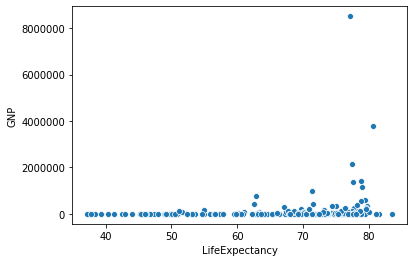

In [15]:
sns.scatterplot(data=df, x="LifeExpectancy", y="GNP")

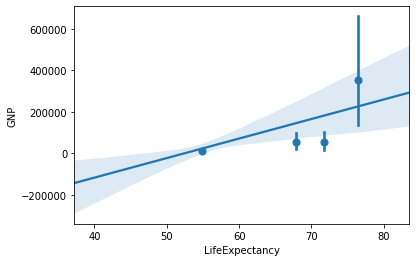

In [17]:
sns.regplot(data=df, x="LifeExpectancy", y="GNP", x_bins=4)

In [19]:
x = df.LifeExpectancy
y = df.GNP

In [20]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

ValueError: array must not contain infs or NaNs

In [23]:
df.LifeExpectancy.isnull().value_counts()

False    222
True      17
Name: LifeExpectancy, dtype: int64

In [30]:
mean = df.LifeExpectancy.mean()

In [25]:
df.LifeExpectancy.mode()

0    71.4
1    73.7
2    78.8
dtype: float64

In [26]:
df.LifeExpectancy.median()

70.15

In [29]:
df.GNP.isnull().value_counts()

False    239
Name: GNP, dtype: int64

In [33]:
new_df = df.LifeExpectancy.fillna(mean)

In [32]:
df.LifeExpectancy.isnull().value_counts()

False    222
True      17
Name: LifeExpectancy, dtype: int64

In [35]:
df.LifeExpectancy.fillna(mean, inplace=True)

In [36]:
df.LifeExpectancy.isnull().value_counts()

False    239
Name: LifeExpectancy, dtype: int64

In [37]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.16385955132633062
p = 0.011177572806720678


In [38]:
##There is a significant relationship between GNP and Life Expectancy

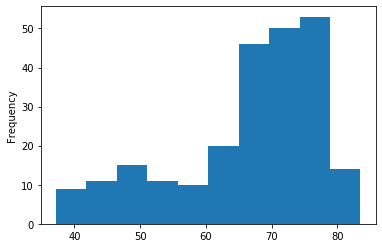

In [39]:
df['LifeExpectancy'].plot(kind='hist')


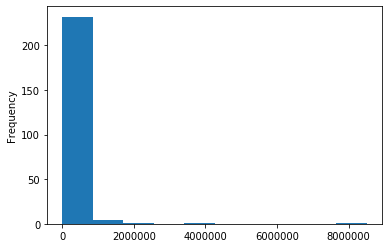

In [40]:
df['GNP'].plot(kind='hist')


In [41]:
df['LifeExpectancy'].describe()


count    239.000000
mean      66.486036
std       11.100244
min       37.200000
25%       61.650000
50%       69.200000
75%       75.150000
max       83.500000
Name: LifeExpectancy, dtype: float64

In [42]:
df['GNP'].describe()


count    2.390000e+02
mean     1.228239e+05
std      6.379976e+05
min      0.000000e+00
25%      6.400000e+02
50%      4.787000e+03
75%      2.994450e+04
max      8.510700e+06
Name: GNP, dtype: float64

In [43]:
pd.qcut(df['GNP'], q=4)

0           (640.0, 4787.0]
1         (4787.0, 29944.5]
2         (4787.0, 29944.5]
3           (-0.001, 640.0]
4           (640.0, 4787.0]
               ...         
234       (4787.0, 29944.5]
235       (4787.0, 29944.5]
236    (29944.5, 8510700.0]
237         (640.0, 4787.0]
238       (4787.0, 29944.5]
Name: GNP, Length: 239, dtype: category
Categories (4, interval[float64]): [(-0.001, 640.0] < (640.0, 4787.0] < (4787.0, 29944.5] < (29944.5, 8510700.0]]

In [44]:
df['quantile'] = pd.qcut(df['GNP'], q=4)


In [48]:
df['quantile'].value_counts()

(29944.5, 8510700.0]    60
(640.0, 4787.0]         60
(-0.001, 640.0]         60
(4787.0, 29944.5]       59
Name: quantile, dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Code            239 non-null    object  
 1   Name            239 non-null    object  
 2   Continent       239 non-null    object  
 3   Region          239 non-null    object  
 4   SurfaceArea     239 non-null    float64 
 5   IndepYear       192 non-null    float64 
 6   Population      239 non-null    int64   
 7   LifeExpectancy  239 non-null    float64 
 8   GNP             239 non-null    float64 
 9   GNPOld          178 non-null    float64 
 10  LocalName       239 non-null    object  
 11  GovernmentForm  239 non-null    object  
 12  HeadOfState     238 non-null    object  
 13  Capital         232 non-null    float64 
 14  Code2           239 non-null    object  
 15  quantile        239 non-null    category
dtypes: category(1), float64(6), int64(1), object(8)
memory usage: 

In [56]:
df['quant_rank'] = np.where(df['quantile'] == '-0.001, 640.0', 1, 0)


In [60]:
df.drop(columns='quant_rank', inplace=True)

In [61]:
df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,quantile
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,"(640.0, 4787.0]"
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,"(4787.0, 29944.5]"
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO,"(4787.0, 29944.5]"
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,"(-0.001, 640.0]"
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,"(640.0, 4787.0]"


In [63]:
df['quantile'] = df['quantile'].astype('str')

In [64]:
# df['quant_rank'] = df['quant_rank'] = np.where(df['quantile']str.contains('-0.001, 640.0'))
df.loc[df['quantile'].str.contains('29944.5, 8510700.0'),'quant_rank'] = 4
df.loc[df['quantile'].str.contains('4787.0, 29944.5'),'quant_rank'] = 3
df.loc[df['quantile'].str.contains('640.0, 4787.0'),'quant_rank'] = 2
df.loc[df['quantile'].str.contains('-0.001, 640.0'),'quant_rank'] = 1

In [65]:
df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,quantile,quant_rank
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,"(640.0, 4787.0]",2.0
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,"(4787.0, 29944.5]",3.0
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO,"(4787.0, 29944.5]",3.0
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,"(-0.001, 640.0]",1.0
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,"(640.0, 4787.0]",2.0


In [66]:
pd.qcut(df['LifeExpectancy'], q=4)

0                    (75.15, 83.5]
1      (37.199000000000005, 61.65]
2      (37.199000000000005, 61.65]
3                    (75.15, 83.5]
4                    (69.2, 75.15]
                  ...             
234    (37.199000000000005, 61.65]
235                  (69.2, 75.15]
236    (37.199000000000005, 61.65]
237    (37.199000000000005, 61.65]
238    (37.199000000000005, 61.65]
Name: LifeExpectancy, Length: 239, dtype: category
Categories (4, interval[float64]): [(37.199000000000005, 61.65] < (61.65, 69.2] < (69.2, 75.15] < (75.15, 83.5]]

In [67]:
df['age_quanitle'] = pd.qcut(df['LifeExpectancy'], q=4)

In [70]:
df['age_quantile'] = pd.qcut(df['LifeExpectancy'], q=4)

In [71]:
df.drop(columns='age_quanitle', inplace=True)

In [72]:
df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,quantile,quant_rank,age_quantile
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,"(640.0, 4787.0]",2.0,"(75.15, 83.5]"
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]"
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO,"(4787.0, 29944.5]",3.0,"(37.199000000000005, 61.65]"
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI,"(-0.001, 640.0]",1.0,"(75.15, 83.5]"
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL,"(640.0, 4787.0]",2.0,"(69.2, 75.15]"


In [73]:
df['age_quantile'].value_counts()

(75.15, 83.5]                  60
(61.65, 69.2]                  60
(37.199000000000005, 61.65]    60
(69.2, 75.15]                  59
Name: age_quantile, dtype: int64

In [74]:
df['age_quantile'] = df['age_quantile'].astype('str')

In [75]:
df.loc[df['age_quantile'].str.contains('75.15, 83.5'),'age_rank'] = 4
df.loc[df['age_quantile'].str.contains('69.2, 75.15'),'age_rank'] = 3
df.loc[df['age_quantile'].str.contains('61.65, 69.2'),'age_rank'] = 2
df.loc[df['age_quantile'].str.contains('37.199000000000005, 61.65'),'age_rank'] = 1